![2](images/2.png)

# 2.1) Estabilidad — CFL para esquema adelanto en tiempo + atraso en espacio

**Contexto y objetivo**
Te piden: con $c=-4$ y $\Delta x = 2$, encontrar el máximo $\Delta t$ que garantice estabilidad para el esquema “adelanto en tiempo y atraso en espacio” (es decir el esquema que en la parte 1 corresponde a (2)).

**Qué es la condición CFL (Condición Courant-Friedrichs-Lewy) (intuitiva):**
Para esquemas explícitos que discretizan advección, la estabilidad suele pedirse que la información “no viaje más lejos” en un paso de tiempo de lo que permite la malla espacio-temporal. Es una condición entre $\Delta t, \Delta x$ y la velocidad característica $c$. Se define el número adimensional

$$
\nu = \frac{c\,\Delta t}{\Delta x}.
$$

Para el esquema atrasado (upwind correcto cuando $c>0$) la condición de estabilidad por análisis de von-Neumann resulta:

$$
0 \le \nu \le 1.
$$

(Esto implica $\Delta t \le \frac{\Delta x}{c}$ si $c>0$.)

**Aplicación a tu caso**
Aquí $c=-4$ (negativo). Si sustituyes:

$$
\nu = \frac{c\,\Delta t}{\Delta x} = \frac{-4\,\Delta t}{2} = -2\Delta t.
$$

Pero la condición $0\le\nu\le 1$ pide $\nu\ge0$. Con $c<0$ y $\Delta t>0$ nunca se cumple $\nu\ge0$ (porque $\nu$ es negativo). Por lo tanto:

* **Conclusión:** El esquema “adelanto en tiempo + atraso en espacio” **no es estable** para $c=-4$. No existe $\Delta t>0$ que estabilice ese esquema en este caso.

**¿Por qué?**
Ese esquema es el *upwind* para velocidades $c>0$ (porque usa la información hacia atrás en el espacio). Para $c<0$ el upwind “correcto” invierte la diferencia espacial (se usa `avance` en espacio: $u_{i+1}^n - u_i^n$). Si corriges el esquema para que sea upwind con $c<0$, la condición CFL típica queda en términos de $|c|$:

$$
\frac{|c|\,\Delta t}{\Delta x} \le 1 \quad\Longrightarrow\quad \Delta t \le \frac{\Delta x}{|c|}.
$$

Aplicando $\Delta x=2,\ |c|=4$ → $\Delta t \le 0.5$ (horas, si las unidades del problema las pedimos así).
Pero eso ya es para el esquema upwind correcto (aviso: el esquema original de la consigna era el atrasado en espacio → inestable cuando $c<0$).


# 2.2) Derivada con SymPy

**Problema:**
Calcular $\dfrac{d}{dx}$ de

$$
f(x) = \frac{\cos^2(x)\, \sin^3(x)}{4 x^5 e^{x}}
$$

y evaluar en $x=2.2$.

**Cómo se hace (pasos conceptuales):**

1. Usa la regla del cociente: si $f = g/h$, $f'=(g' h - g h')/h^2$.
2. Aquí $g(x)=\cos^2(x)\sin^3(x)$ y $h(x)=4 x^5 e^x$.
3. Deriva $g$ usando producto y regla de la cadena (derivada de $\cos^2$ y $\sin^3$).
4. Deriva $h$ con producto (potencia x^5 y $e^x$).

**Con SymPy**:


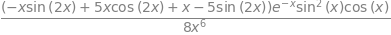

In [2]:
import sympy as sp
from sympy import init_printing
x = sp.symbols('x')
f = (sp.cos(x)**2 * sp.sin(x)**3) / (4 * x**5 * sp.exp(x))
dfdx = sp.diff(f, x)
dfdx_simpl = sp.simplify(dfdx)
valor = float(dfdx_simpl.evalf(subs={x:2.2}))
# Markdown-friendly (ASCII)

init_printing(use_latex=True)
dfdx_simpl


**Resultado simbólico (forma compacta que da SymPy):**

$$
f'(x) = \frac{e^{-x}\big(2\cos(x)\sin^4(x)-3\cos^3(x)\sin^2(x)-\cos^2(x)\sin^3(x)(x+5)\big)}{4x^6}.
$$

**Evaluación numérica en $x=2.2$:**

$$
f'(2.2) \approx -0.0054457 \quad(\text{aprox. } -5.45\times 10^{-3}).
$$

Interpretación: el derivado es negativo en ese punto; eso significa que la función decrece (localmente) en $x=2.2$.

![2.2](images/2.2.png)